In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:

data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [17]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


### Data Preprocessing

In [19]:
data.shape

(7920, 3)

In [20]:
data.duplicated().sum()

np.int64(0)

In [21]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [23]:
import re
import string

In [24]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

Convert Uppercase to Lowercase

In [25]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [26]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove links

In [27]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [28]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [31]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Numbers

In [33]:
data["tweet"] = data['tweet'].str.replace('d+', '', regex=True)

In [38]:
data["tweet"].tail(10)

7910    perfect match instagoo applewatch re instagram...
7911    i am completely in love with the new iphone em...
7912    tune in turn on rop out  gt in one app  mobile...
7913    ok so my galaxy crashe after one ay now i have...
7914    gain followers rt this must follow me i follow...
7915    live out lou lol liveoutlou selfie smile sony ...
7916    we woul like to wish you an amazing ay make ev...
7917    helping my lovely  year ol neighbor with her i...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Stopwords

In [37]:
import nltk

In [40]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [41]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [42]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [43]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [44]:
data["tweet"].head()

0    fingerprint pregnancy test anroi apps beautifu...
1    finally transparant silicon case thanks uncle ...
2    love woul go talk makememories unplug relax ip...
3    im wire know im george mae way iphone cute ave...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [45]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [46]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [47]:
data["tweet"].head()

0    fingerprint pregnanc test anroi app beauti cut...
1    final transpar silicon case thank uncl yay son...
2    love woul go talk makememori unplug relax ipho...
3    im wire know im georg mae way iphon cute avent...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [48]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test anroi app beauti cut...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love woul go talk makememori unplug relax ipho...
3,4,0,im wire know im georg mae way iphon cute avent...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live lou lol liveoutl selfi smile soni music h...
7916,7917,0,woul like wish amaz ay make everi minut count ...
7917,7918,0,help love year ol neighbor ipa morn mae realis...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vacabulary

In [49]:
from collections import Counter
vocab = Counter()

In [50]:
vocab

Counter()

In [52]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [53]:
vocab

Counter({'iphon': 4072,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 753,
         'ipa': 537,
         'rt': 526,
         'love': 499,
         'like': 455,
         'ay': 447,
         'app': 416,
         'life': 415,
         'anroi': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'toay': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'fun': 281,
         'got': 280,
         'news': 265,
         'thank': 263,
         'music': 263,
         'go': 259,
         'one': 259,
         'time': 248,
         'make': 247,
         'upat': 236,
         'smile': 231,
         'instagoo

In [54]:
len(vocab)

15773

In [55]:
tokens = [key for key in vocab if vocab[key] > 10]

In [56]:
tokens

['test',
 'anroi',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'woul',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'mae',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupi',
 'support',
 'softwar',
 'upat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instaaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'bay',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'pool',
 'water',
 'camera',
 'picoftheay',
 'sun',
 'instagoo',
 'boy',
 'outoor',
 'hey',
 'make',
 'ipo',
 'ont',
 'color',
 'inch',
 'crash',
 'everi',
 'ha',
 'oe',
 'nee',
 'realli',
 'ropp',
 'ball',
 'esign',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'har',
 'play',

In [57]:
len(tokens)

1147

In [58]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide Dataset

In [59]:
X = data['tweet']
y = data['label']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
X_train

6361    fuck iphon itun gay fuckoff gay lamea hateit i...
2450    caus im happy♬♪ tv smart tv samsung munial soc...
2762    love look new phone bright cheeri color bright...
5205    new hack byp iphon passco access photo messag ...
7068     enkymion appl lost iphon name right brazil lmfao
                              ...                        
955     beauti shop aliusaexpress iphon io app cat gb ...
877     unlock level zen block come soon relax iphon s...
1030         bought new phone love samsung roar galaxynot
6986    kin morn one woul wakeup iphon iphon iphonesia...
7389    follow capetownsup instagram sup surf fun cape...
Name: tweet, Length: 6336, dtype: object

In [64]:
X_test

3864    ear appl offici hatey itun syncfail howmanytim...
6004    il sont content lizarsqua psn xboxliv hack amn...
7387    bioagar that gave away iphon got winow phone i...
56      black friay call ‘black friay’httpswwwbostonco...
2149    hate phone right rop call heat shut ranomli fu...
                              ...                        
5598    samsung galaxi go launch toay inia offici even...
4837    small garen — steemit … garen small new life a...
5500    hack passwor wifi prank lion le watermelo appl...
4516    gain follow rt must follow follow back follow ...
2480                sure see snow sunay tmobil samsung gs
Name: tweet, Length: 1584, dtype: object

In [65]:
y_train

6361    1
2450    0
2762    0
5205    0
7068    1
       ..
955     0
877     0
1030    0
6986    0
7389    0
Name: label, Length: 6336, dtype: int64

### Vectorization

In [66]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [67]:
vectorized_x_train = vectorizer(X_train, tokens)

In [68]:
vectorized_x_test = vectorizer(X_test, tokens)

In [69]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1147), dtype=float32)

In [70]:
y_train

6361    1
2450    0
2762    0
5205    0
7068    1
       ..
955     0
877     0
1030    0
6986    0
7389    0
Name: label, Length: 6336, dtype: int64

In [71]:
vectorized_x_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1147), dtype=float32)

In [72]:
y_test

3864    1
6004    0
7387    1
56      0
2149    1
       ..
5598    0
4837    0
5500    0
4516    0
2480    0
Name: label, Length: 1584, dtype: int64

In [73]:
y_train.value_counts()

label
0    4727
1    1609
Name: count, dtype: int64

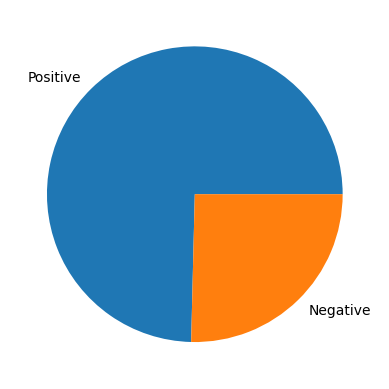

In [74]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9454, 1147) (9454,)


In [77]:
y_train_smote.value_counts()

label
1    4727
0    4727
Name: count, dtype: int64

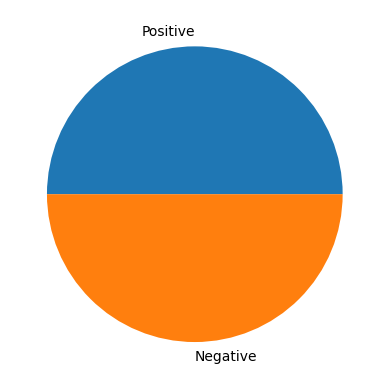

In [78]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [79]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9454, 1147), dtype=float32)

In [80]:
y_train_smote

0       1
1       0
2       0
3       0
4       1
       ..
9449    1
9450    1
9451    1
9452    1
9453    1
Name: label, Length: 9454, dtype: int64

In [81]:
vectorized_x_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1147), dtype=float32)

In [82]:
y_test

3864    1
6004    0
7387    1
56      0
2149    1
       ..
5598    0
4837    0
5500    0
4516    0
2480    0
Name: label, Length: 1584, dtype: int64

### Model Training and Evaluation

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [84]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [85]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.939
	Precision = 0.915
	Recall = 0.968
	F1-Score = 0.941
Testing Scores:
	Accuracy = 0.861
	Precision = 0.689
	Recall = 0.861
	F1-Score = 0.765


### Naive Bayes

In [86]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.907
	Precision = 0.87
	Recall = 0.956
	F1-Score = 0.911
Testing Scores:
	Accuracy = 0.86
	Precision = 0.668
	Recall = 0.93
	F1-Score = 0.778


### Decision Tree

In [87]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.824
	Precision = 0.667
	Recall = 0.659
	F1-Score = 0.663


### Random Forest

In [88]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.848
	Precision = 0.707
	Recall = 0.722
	F1-Score = 0.714


### Support Vector Machine

In [89]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.962
	Recall = 0.997
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.867
	Precision = 0.711
	Recall = 0.832
	F1-Score = 0.767


In [90]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)